# Day 1

## Problem 1

At the first Go / No Go poll, every Elf is Go until the Fuel Counter-Upper. They haven't determined the amount of fuel required yet.

Fuel required to launch a given module is based on its mass. Specifically, to find the fuel required for a module, take its mass, divide by three, round down, and subtract 2.

In [4]:
import math
def problem1(mass):
    return math.floor(mass / 3) - 2

In [7]:
# For a mass of 12, divide by 3 and round down to get 4, then subtract 2 to get 2.

problem1(12)

2

In [9]:
# For a mass of 14, dividing by 3 and rounding down still yields 4, so the fuel required is also 2.

problem1(14)

2

In [10]:
# For a mass of 1969, the fuel required is 654

problem1(1969)

654

In [11]:
# For a mass of 100756, the fuel required is 33583.

problem1(100756)

33583

In [31]:
input = """
140403
114038
56226
132100
62000
111395
91372
126850
145044
79273
91088
84429
58971
107626
149678
85268
105251
115850
115947
74982
75008
97761
121022
148319
125244
138640
86968
144443
137218
139558
128776
53593
133805
64245
113120
63085
59209
51671
63956
139163
119501
77432
51040
137313
58973
64708
76505
108041
101124
133219
95907
57933
117791
76209
102960
90848
141969
91297
146254
84585
103447
83172
76648
111340
118543
52957
86004
131965
90898
90909
52217
144674
97058
72387
57962
147792
114025
100193
77582
146708
54283
143979
99582
149890
73229
56045
63240
124091
103324
125187
74027
120344
105333
100939
131454
109570
149398
140535
57379
138385
"""
masses = [int(i) for i in input.split("\n") if i != ""]
fuel_reqs = [problem1(i) for i in masses]
sum(fuel_reqs)

3380731

## Problem 2

Fuel itself requires fuel just like a module - take its mass, divide by three, round down, and subtract 2. However, that fuel also requires fuel, and that fuel requires fuel, and so on. Any mass that would require negative fuel should instead be treated as if it requires zero fuel; the remaining mass, if any, is instead handled by wishing really hard, which has no mass and is outside the scope of this calculation.

So, for each module mass, calculate its fuel and add it to the total. Then, treat the fuel amount you just calculated as the input mass and repeat the process, continuing until a fuel requirement is zero or negative.

In [42]:
def additional_fuel_reqs(fuel_reqs):
    new_reqs = [problem1(i) for i in fuel_reqs if problem1(i) > 0]
    if len(new_reqs) > 0:
        return new_reqs + additional_fuel_reqs(new_reqs)
    else:
        return new_reqs
    
sum(fuel_reqs + additional_fuel_reqs(fuel_reqs))

5068210

# Day 2

## Problem 1

On the way to your gravity assist around the Moon, your ship computer beeps angrily about a "1202 program alarm". On the radio, an Elf is already explaining how to handle the situation: "Don't worry, that's perfectly norma--" The ship computer bursts into flames.

You notify the Elves that the computer's magic smoke seems to have escaped. "That computer ran Intcode programs like the gravity assist program it was working on; surely there are enough spare parts up there to build a new Intcode computer!"

An Intcode program is a list of integers separated by commas (like 1,0,0,3,99). To run one, start by looking at the first integer (called position 0). Here, you will find an opcode - either 1, 2, or 99. The opcode indicates what to do; for example, 99 means that the program is finished and should immediately halt. Encountering an unknown opcode means something went wrong.

Opcode 1 adds together numbers read from two positions and stores the result in a third position. The three integers immediately after the opcode tell you these three positions - the first two indicate the positions from which you should read the input values, and the third indicates the position at which the output should be stored.

For example, if your Intcode computer encounters 1,10,20,30, it should read the values at positions 10 and 20, add those values, and then overwrite the value at position 30 with their sum.

Opcode 2 works exactly like opcode 1, except it multiplies the two inputs instead of adding them. Again, the three integers after the opcode indicate where the inputs and outputs are, not their values.

Once you're done processing an opcode, move to the next one by stepping forward 4 positions.

For example, suppose you have the following program:

```
1,9,10,3,2,3,11,0,99,30,40,50
```

For the purposes of illustration, here is the same program split into multiple lines:

```
1,9,10,3,
2,3,11,0,
99,
30,40,50
```

The first four integers, 1,9,10,3, are at positions 0, 1, 2, and 3. Together, they represent the first opcode (1, addition), the positions of the two inputs (9 and 10), and the position of the output (3). To handle this opcode, you first need to get the values at the input positions: position 9 contains 30, and position 10 contains 40. Add these numbers together to get 70. Then, store this value at the output position; here, the output position (3) is at position 3, so it overwrites itself. Afterward, the program looks like this:

```
1,9,10,70,
2,3,11,0,
99,
30,40,50
```

Step forward 4 positions to reach the next opcode, 2. This opcode works just like the previous, but it multiplies instead of adding. The inputs are at positions 3 and 11; these positions contain 70 and 50 respectively. Multiplying these produces 3500; this is stored at position 0:

```
3500,9,10,70,
2,3,11,0,
99,
30,40,50
```

Stepping forward 4 more positions arrives at opcode 99, halting the program.

Here are the initial and final states of a few more small programs:

- 1,0,0,0,99 becomes 2,0,0,0,99 (1 + 1 = 2).
- 2,3,0,3,99 becomes 2,3,0,6,99 (3 * 2 = 6).
- 2,4,4,5,99,0 becomes 2,4,4,5,99,9801 (99 * 99 = 9801).
- 1,1,1,4,99,5,6,0,99 becomes 30,1,1,4,2,5,6,0,99.

Once you have a working computer, the first step is to restore the gravity assist program (your puzzle input) to the "1202 program alarm" state it had just before the last computer caught fire. To do this, before running the program, replace position 1 with the value 12 and replace position 2 with the value 2. What value is left at position 0 after the program halts?



In [50]:
def day2_step(input, current_index=0):
    opcode = input[current_index]
    if opcode == 1:
        input[input[current_index + 3]] = input[input[current_index + 1]] + input[input[current_index + 2]]
        return day2_step(input, current_index + 4)
    elif opcode == 2:
        input[input[current_index + 3]] = input[input[current_index + 1]] * input[input[current_index + 2]]
        return day2_step(input, current_index + 4)
    elif opcode == 99:
        return input
    else:
        raise ValueError('Invalid opcode')

In [51]:
day2_step([1,9,10,3,2,3,11,0,99,30,40,50])

[3500, 9, 10, 70, 2, 3, 11, 0, 99, 30, 40, 50]

In [45]:
day2_step([1,0,0,0,99])

[2, 0, 0, 0, 99]

In [46]:
day2_step([2,3,0,3,99])

[2, 3, 0, 6, 99]

In [47]:
day2_step([2,4,4,5,99,0])

[2, 4, 4, 5, 99, 9801]

In [48]:
day2_step([1,1,1,4,99,5,6,0,99])

[30, 1, 1, 4, 2, 5, 6, 0, 99]

In [55]:
input = [1,12,2,3,1,1,2,3,1,3,4,3,1,5,0,3,2,6,1,19,1,19,10,23,2,13,23,27,1,5,27,31,2,6,31,35,1,6,35,39,2,39,9,43,1,5,43,47,1,13,47,51,1,10,51,55,2,55,10,59,2,10,59,63,1,9,63,67,2,67,13,71,1,71,6,75,2,6,75,79,1,5,79,83,2,83,9,87,1,6,87,91,2,91,6,95,1,95,6,99,2,99,13,103,1,6,103,107,1,2,107,111,1,111,9,0,99,2,14,0,0]

def run_intcode_command(noun, verb):
    memory = input.copy()
    memory[1] = noun
    memory[2] = verb
    return day2_step(memory)[0]

In [56]:
run_intcode_command(12, 2)

4138687

## Problem 2

"Good, the new computer seems to be working correctly! Keep it nearby during this mission - you'll probably use it again. Real Intcode computers support many more features than your new one, but we'll let you know what they are as you need them."

"However, your current priority should be to complete your gravity assist around the Moon. For this mission to succeed, we should settle on some terminology for the parts you've already built."

Intcode programs are given as a list of integers; these values are used as the initial state for the computer's memory. When you run an Intcode program, make sure to start by initializing memory to the program's values. A position in memory is called an address (for example, the first value in memory is at "address 0").

Opcodes (like 1, 2, or 99) mark the beginning of an instruction. The values used immediately after an opcode, if any, are called the instruction's parameters. For example, in the instruction 1,2,3,4, 1 is the opcode; 2, 3, and 4 are the parameters. The instruction 99 contains only an opcode and has no parameters.

The address of the current instruction is called the instruction pointer; it starts at 0. After an instruction finishes, the instruction pointer increases by the number of values in the instruction; until you add more instructions to the computer, this is always 4 (1 opcode + 3 parameters) for the add and multiply instructions. (The halt instruction would increase the instruction pointer by 1, but it halts the program instead.)

"With terminology out of the way, we're ready to proceed. To complete the gravity assist, you need to determine what pair of inputs produces the output 19690720."

The inputs should still be provided to the program by replacing the values at addresses 1 and 2, just like before. In this program, the value placed in address 1 is called the noun, and the value placed in address 2 is called the verb. Each of the two input values will be between 0 and 99, inclusive.

Once the program has halted, its output is available at address 0, also just like before. Each time you try a pair of inputs, make sure you first reset the computer's memory to the values in the program (your puzzle input) - in other words, don't reuse memory from a previous attempt.

Find the input noun and verb that cause the program to produce the output 19690720. What is 100 * noun + verb? (For example, if noun=12 and verb=2, the answer would be 1202.)

In [57]:
def solve_day2_problem2(x):
    for noun in range(100):
        for verb in range(100):
            try:
                result = run_intcode_command(noun, verb)
            except:
                continue
            else:
                if result == x:
                    return (noun, verb)
                
solve_day2_problem2(19690720)

(66, 35)

# Day 3 - Crossed Wires

## Problem 1

The gravity assist was successful, and you're well on your way to the Venus refuelling station. During the rush back on Earth, the fuel management system wasn't completely installed, so that's next on the priority list.

Opening the front panel reveals a jumble of wires. Specifically, two wires are connected to a central port and extend outward on a grid. You trace the path each wire takes as it leaves the central port, one wire per line of text (your puzzle input).

The wires twist and turn, but the two wires occasionally cross paths. To fix the circuit, you need to find the intersection point closest to the central port. Because the wires are on a grid, use the Manhattan distance for this measurement. While the wires do technically cross right at the central port where they both start, this point does not count, nor does a wire count as crossing with itself.

For example, if the first wire's path is R8,U5,L5,D3, then starting from the central port (o), it goes right 8, up 5, left 5, and finally down 3:

```
...........
...........
...........
....+----+.
....|....|.
....|....|.
....|....|.
.........|.
.o-------+.
...........
```

Then, if the second wire's path is U7,R6,D4,L4, it goes up 7, right 6, down 4, and left 4:

```
...........
.+-----+...
.|.....|...
.|..+--X-+.
.|..|..|.|.
.|.-X--+.|.
.|..|....|.
.|.......|.
.o-------+.
...........
```

These wires cross at two locations (marked X), but the lower-left one is closer to the central port: its distance is 3 + 3 = 6.

Here are a few more examples:

- R75,D30,R83,U83,L12,D49,R71,U7,L72
- U62,R66,U55,R34,D71,R55,D58,R83 = distance 159
- R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51
- U98,R91,D20,R16,D67,R40,U7,R15,U6,R7 = distance 135

What is the Manhattan distance from the central port to the closest intersection?

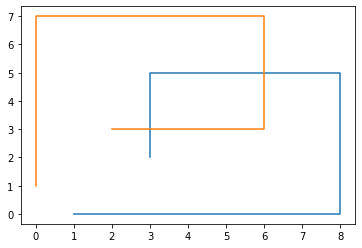

Crossing points:  {(3, 3), (6, 5)}
Distances : [6, 11]
Smallest distance : 6


In [75]:
import matplotlib.pyplot as plt

def wire_path(path_definition):
    instructions = path_definition.split(",")
    current_position = [0, 0]
    wire_positions = []
    for instruction in instructions:
        direction = instruction[0]
        distance = int(instruction[1:])
        for i in range(distance):
            if direction == 'R':
                current_position[0] = current_position[0] + 1
            elif direction == 'L':
                current_position[0] = current_position[0] - 1
            elif direction == 'U':
                current_position[1] = current_position[1] + 1
            elif direction == 'D':
                current_position[1] = current_position[1] - 1
            else:
                raise ValueError('Invalid instruction')
            wire_positions.append((current_position[0], current_position[1]))
    return wire_positions

def wire_path_intersections(a, b):
    return set(a).intersection(set(b))

def plot_wire_path(wire_path):
    plt.plot([i[0] for i in wire_path], [i[1] for i in wire_path])
    
def analyze_wire_paths(a, b):
    a = wire_path(a)
    b = wire_path(b)
    plot_wire_path(a)
    plot_wire_path(b)
    plt.show()
    intersections = wire_path_intersections(a, b)
    print("Crossing points: ", intersections)
    distances = [(abs(i[0]) + abs(i[1])) for i in intersections]
    print("Distances :", distances)
    print("Smallest distance :", min(distances))
    
analyze_wire_paths("R8,U5,L5,D3", "U7,R6,D4,L4")

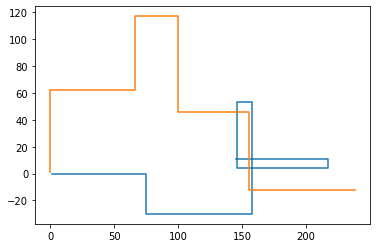

Crossing points:  {(158, -12), (146, 46), (155, 4), (155, 11)}
Distances : [170, 192, 159, 166]
Smallest distance : 159


In [76]:
analyze_wire_paths("R75,D30,R83,U83,L12,D49,R71,U7,L72", "U62,R66,U55,R34,D71,R55,D58,R83")

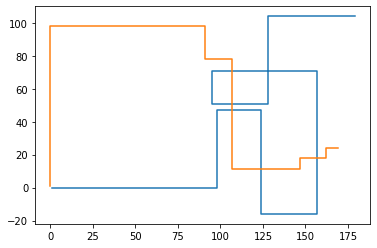

Crossing points:  {(107, 71), (157, 18), (124, 11), (107, 47), (107, 51)}
Distances : [178, 175, 135, 154, 158]
Smallest distance : 135


In [77]:
analyze_wire_paths("R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51", "U98,R91,D20,R16,D67,R40,U7,R15,U6,R7")

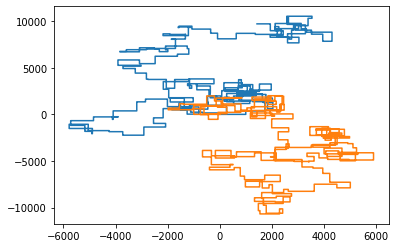

Crossing points:  {(365, 1795), (257, 763), (1756, 1422), (1851, 1277), (-1838, 493), (1752, 1362), (1773, 1502), (1733, 417), (1733, 823), (1266, 1857), (166, 1747), (1773, 1665), (998, 349), (257, 218), (-1051, 561), (108, 977), (1752, 1293), (-998, 233), (76, 1747), (365, 1747), (-1568, 668), (1773, 1857), (1330, 1519), (735, 1747), (1330, 1457), (-998, 561), (735, 1795), (1851, 1283), (1756, 1502), (-1978, 619), (2038, 1068), (-804, 611), (-457, 949), (2018, 1422), (-201, 1945), (264, 1795), (831, 1747), (108, 1779), (831, 1795), (1832, 823), (1968, 1750), (-125, 1747), (1236, 1519), (-369, 1977), (-1118, 493), (531, 1795), (1665, 1502), (1851, 1750), (-743, 561), (1773, 1422), (2018, 1502), (257, 946), (166, 1795), (264, 1747), (1330, 1362), (-457, 894), (1733, 389), (-138, 977), (1634, 1665), (-605, 154), (1211, 367), (-1508, 1141), (-743, 233), (-201, 1779), (1421, 367), (1634, 1857), (52, 1747), (1266, 1502), (2038, 823), (531, 1747), (1752, 1277), (1634, 1502), (-1361, 1087), 

In [78]:
analyze_wire_paths(
    "R998,U367,R735,U926,R23,U457,R262,D473,L353,U242,L930,U895,R321,U683,L333,U623,R105,D527,R437,D473,L100,D251,L958,U384,R655,U543,L704,D759,R529,D176,R835,U797,R453,D650,L801,U437,L468,D841,R928,D747,L803,U677,R942,D851,R265,D684,L206,U763,L566,U774,L517,U337,L86,D585,R212,U656,L799,D953,L24,U388,L465,U656,L467,U649,R658,U519,L966,D290,L979,D819,R208,D907,R941,D458,L882,U408,R539,D939,R557,D771,L448,U460,L586,U148,R678,U360,R715,U312,L12,D746,L958,U216,R275,D278,L368,U663,L60,D543,L605,D991,L369,D599,R464,D387,L835,D876,L810,U377,L521,U113,L803,U680,L732,D449,R891,D558,L25,U249,L264,U643,L544,U504,R876,U403,R950,U19,L224,D287,R28,U914,R906,U970,R335,U295,R841,D810,R891,D596,R451,D79,R924,U823,L724,U968,R342,D349,R656,U373,R864,U374,L401,D102,L730,D886,R268,D188,R621,U258,L788,U408,L199,D422,R101,U368,L636,U543,R7,U722,L533,U242,L340,D195,R158,D291,L84,U936,L570,D937,L321,U947,L707,U32,L56,U650,L427,U490,L472,U258,R694,U87,L887,U575,R826,D398,R602,U794,R855,U225,R435,U591,L58,U281,L834,D400,R89,D201,L328,U278,L494,D70,L770,D182,L251,D44,R753,U431,R573,D71,R809,U983,L159,U26,R540,U516,R5,D23,L603,U65,L260,D187,R973,U877,R110,U49,L502,D68,R32,U153,R495,D315,R720,D439,R264,D603,R717,U586,R732,D111,R997,U578,L243,U256,R147,D425,L141,U758,R451,U779,R964,D219,L151,D789,L496,D484,R627,D431,R433,D761,R355,U975,L983,U364,L200,U578,L488,U668,L48,D774,R438,D456,L819,D927,R831,D598,L437,U979,R686,U930,L454,D553,L77,D955,L98,U201,L724,U211,R501,U492,L495,U732,L511",
    "L998,U949,R912,D186,R359,D694,L878,U542,L446,D118,L927,U175,R434,U473,R147,D54,R896,U890,R300,D537,R254,D322,R758,D690,R231,U269,R288,U968,R638,U192,L732,D355,R879,U451,R336,D872,L141,D842,L126,U584,L973,D940,R890,D75,L104,U340,L821,D590,R577,U859,L948,D199,L872,D751,L368,U506,L308,U827,R181,U94,R670,U901,R739,D48,L985,D801,R722,D597,R654,D606,R183,U646,R939,U677,R32,U936,L541,D934,R316,U354,L415,D930,R572,U571,R147,D609,L534,D406,R872,D527,L816,D960,R652,D429,L402,D858,R374,D930,L81,U106,R977,U251,R917,U966,R353,U732,L613,U280,L713,D937,R481,U52,R746,U203,L500,D557,L209,U249,R89,D58,L149,U872,R331,D460,R343,D423,R392,D160,L876,U981,L399,D642,R525,U515,L537,U113,R886,D516,L301,D680,L236,U399,R460,D869,L942,D280,R669,U476,R683,D97,R199,D444,R137,D489,L704,D120,R753,D100,L737,U375,L495,D325,R48,D269,R575,U895,L184,D10,L502,D610,R618,D744,R585,U861,R695,D775,L942,U64,L819,U161,L332,U513,L461,D366,R273,D493,L197,D97,L6,U63,L564,U59,L699,U30,L68,U861,R35,U564,R540,U371,L115,D595,L412,D781,L185,D41,R207,D264,R999,D799,R421,D117,R377,D571,R268,D947,R77,D2,R712,D600,L516,U389,L868,D762,L996,U205,L178,D339,L844,D629,R67,D732,R109,D858,R630,U470,L121,D542,L751,U353,L61,U770,R952,U703,R264,D537,L569,U55,L795,U389,R836,U166,R585,U275,L734,U966,L130,D357,L260,U719,L647,D606,R547,U575,R791,U686,L597,D486,L774,U386,L163,U912,L234,D238,L948,U279,R789,U300,R117,D28,L833,U835,L340,U693,R343,D573,R882,D241,L731,U812,R600,D663,R902,U402,R831,D802,L577,U920,L947,D538,L192"
)

## Problem 2

It turns out that this circuit is very timing-sensitive; you actually need to minimize the signal delay.

To do this, calculate the number of steps each wire takes to reach each intersection; choose the intersection where the sum of both wires' steps is lowest. If a wire visits a position on the grid multiple times, use the steps value from the first time it visits that position when calculating the total value of a specific intersection.

The number of steps a wire takes is the total number of grid squares the wire has entered to get to that location, including the intersection being considered. Again consider the example from above:

```
...........
.+-----+...
.|.....|...
.|..+--X-+.
.|..|..|.|.
.|.-X--+.|.
.|..|....|.
.|.......|.
.o-------+.
...........
```

In the above example, the intersection closest to the central port is reached after 8+5+5+2 = 20 steps by the first wire and 7+6+4+3 = 20 steps by the second wire for a total of 20+20 = 40 steps.

However, the top-right intersection is better: the first wire takes only 8+5+2 = 15 and the second wire takes only 7+6+2 = 15, a total of 15+15 = 30 steps.

Here are the best steps for the extra examples from above:

- R75,D30,R83,U83,L12,D49,R71,U7,L72
- U62,R66,U55,R34,D71,R55,D58,R83 = 610 steps
- R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51
- U98,R91,D20,R16,D67,R40,U7,R15,U6,R7 = 410 steps

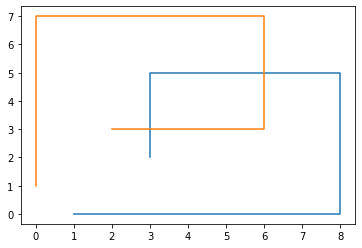

Crossing points:  {(3, 3), (6, 5)}
Distances : [40, 30]
Smallest distance : 30


In [80]:
def analyze_wire_paths_2(a, b):
    a = wire_path(a)
    b = wire_path(b)
    plot_wire_path(a)
    plot_wire_path(b)
    plt.show()
    intersections = wire_path_intersections(a, b)
    print("Crossing points: ", intersections)
    distances = [(a.index(i) + 1 + b.index(i) + 1) for i in intersections]
    print("Distances :", distances)
    print("Smallest distance :", min(distances))
    
analyze_wire_paths_2("R8,U5,L5,D3", "U7,R6,D4,L4")

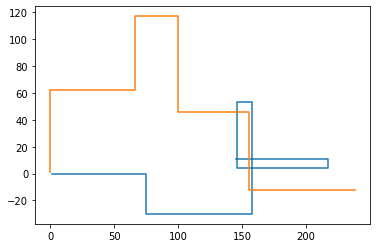

Crossing points:  {(158, -12), (146, 46), (155, 4), (155, 11)}
Distances : [610, 624, 726, 850]
Smallest distance : 610


In [81]:
analyze_wire_paths_2("R75,D30,R83,U83,L12,D49,R71,U7,L72", "U62,R66,U55,R34,D71,R55,D58,R83")

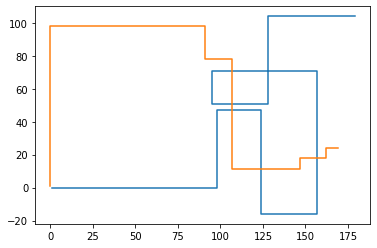

Crossing points:  {(107, 71), (157, 18), (124, 11), (107, 47), (107, 51)}
Distances : [636, 650, 516, 410, 700]
Smallest distance : 410


In [82]:
analyze_wire_paths_2("R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51", "U98,R91,D20,R16,D67,R40,U7,R15,U6,R7")

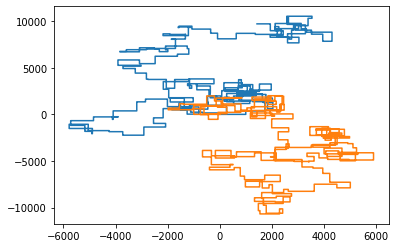

Crossing points:  {(365, 1795), (257, 763), (1756, 1422), (1851, 1277), (-1838, 493), (1752, 1362), (1773, 1502), (1733, 417), (1733, 823), (1266, 1857), (166, 1747), (1773, 1665), (998, 349), (257, 218), (-1051, 561), (108, 977), (1752, 1293), (-998, 233), (76, 1747), (365, 1747), (-1568, 668), (1773, 1857), (1330, 1519), (735, 1747), (1330, 1457), (-998, 561), (735, 1795), (1851, 1283), (1756, 1502), (-1978, 619), (2038, 1068), (-804, 611), (-457, 949), (2018, 1422), (-201, 1945), (264, 1795), (831, 1747), (108, 1779), (831, 1795), (1832, 823), (1968, 1750), (-125, 1747), (1236, 1519), (-369, 1977), (-1118, 493), (531, 1795), (1665, 1502), (1851, 1750), (-743, 561), (1773, 1422), (2018, 1502), (257, 946), (166, 1795), (264, 1747), (1330, 1362), (-457, 894), (1733, 389), (-138, 977), (1634, 1665), (-605, 154), (1211, 367), (-1508, 1141), (-743, 233), (-201, 1779), (1421, 367), (1634, 1857), (52, 1747), (1266, 1502), (2038, 823), (531, 1747), (1752, 1277), (1634, 1502), (-1361, 1087), 

In [83]:
analyze_wire_paths_2(
    "R998,U367,R735,U926,R23,U457,R262,D473,L353,U242,L930,U895,R321,U683,L333,U623,R105,D527,R437,D473,L100,D251,L958,U384,R655,U543,L704,D759,R529,D176,R835,U797,R453,D650,L801,U437,L468,D841,R928,D747,L803,U677,R942,D851,R265,D684,L206,U763,L566,U774,L517,U337,L86,D585,R212,U656,L799,D953,L24,U388,L465,U656,L467,U649,R658,U519,L966,D290,L979,D819,R208,D907,R941,D458,L882,U408,R539,D939,R557,D771,L448,U460,L586,U148,R678,U360,R715,U312,L12,D746,L958,U216,R275,D278,L368,U663,L60,D543,L605,D991,L369,D599,R464,D387,L835,D876,L810,U377,L521,U113,L803,U680,L732,D449,R891,D558,L25,U249,L264,U643,L544,U504,R876,U403,R950,U19,L224,D287,R28,U914,R906,U970,R335,U295,R841,D810,R891,D596,R451,D79,R924,U823,L724,U968,R342,D349,R656,U373,R864,U374,L401,D102,L730,D886,R268,D188,R621,U258,L788,U408,L199,D422,R101,U368,L636,U543,R7,U722,L533,U242,L340,D195,R158,D291,L84,U936,L570,D937,L321,U947,L707,U32,L56,U650,L427,U490,L472,U258,R694,U87,L887,U575,R826,D398,R602,U794,R855,U225,R435,U591,L58,U281,L834,D400,R89,D201,L328,U278,L494,D70,L770,D182,L251,D44,R753,U431,R573,D71,R809,U983,L159,U26,R540,U516,R5,D23,L603,U65,L260,D187,R973,U877,R110,U49,L502,D68,R32,U153,R495,D315,R720,D439,R264,D603,R717,U586,R732,D111,R997,U578,L243,U256,R147,D425,L141,U758,R451,U779,R964,D219,L151,D789,L496,D484,R627,D431,R433,D761,R355,U975,L983,U364,L200,U578,L488,U668,L48,D774,R438,D456,L819,D927,R831,D598,L437,U979,R686,U930,L454,D553,L77,D955,L98,U201,L724,U211,R501,U492,L495,U732,L511",
    "L998,U949,R912,D186,R359,D694,L878,U542,L446,D118,L927,U175,R434,U473,R147,D54,R896,U890,R300,D537,R254,D322,R758,D690,R231,U269,R288,U968,R638,U192,L732,D355,R879,U451,R336,D872,L141,D842,L126,U584,L973,D940,R890,D75,L104,U340,L821,D590,R577,U859,L948,D199,L872,D751,L368,U506,L308,U827,R181,U94,R670,U901,R739,D48,L985,D801,R722,D597,R654,D606,R183,U646,R939,U677,R32,U936,L541,D934,R316,U354,L415,D930,R572,U571,R147,D609,L534,D406,R872,D527,L816,D960,R652,D429,L402,D858,R374,D930,L81,U106,R977,U251,R917,U966,R353,U732,L613,U280,L713,D937,R481,U52,R746,U203,L500,D557,L209,U249,R89,D58,L149,U872,R331,D460,R343,D423,R392,D160,L876,U981,L399,D642,R525,U515,L537,U113,R886,D516,L301,D680,L236,U399,R460,D869,L942,D280,R669,U476,R683,D97,R199,D444,R137,D489,L704,D120,R753,D100,L737,U375,L495,D325,R48,D269,R575,U895,L184,D10,L502,D610,R618,D744,R585,U861,R695,D775,L942,U64,L819,U161,L332,U513,L461,D366,R273,D493,L197,D97,L6,U63,L564,U59,L699,U30,L68,U861,R35,U564,R540,U371,L115,D595,L412,D781,L185,D41,R207,D264,R999,D799,R421,D117,R377,D571,R268,D947,R77,D2,R712,D600,L516,U389,L868,D762,L996,U205,L178,D339,L844,D629,R67,D732,R109,D858,R630,U470,L121,D542,L751,U353,L61,U770,R952,U703,R264,D537,L569,U55,L795,U389,R836,U166,R585,U275,L734,U966,L130,D357,L260,U719,L647,D606,R547,U575,R791,U686,L597,D486,L774,U386,L163,U912,L234,D238,L948,U279,R789,U300,R117,D28,L833,U835,L340,U693,R343,D573,R882,D241,L731,U812,R600,D663,R902,U402,R831,D802,L577,U920,L947,D538,L192"
)

# Day 4: Secure Container

## Problem 1

You arrive at the Venus fuel depot only to discover it's protected by a password. The Elves had written the password on a sticky note, but someone threw it out.

However, they do remember a few key facts about the password:

- It is a six-digit number.
- The value is within the range given in your puzzle input.
- Two adjacent digits are the same (like 22 in 122345).
- Going from left to right, the digits never decrease; they only ever increase or stay the same (like 111123 or 135679).

Other than the range rule, the following are true:

- 111111 meets these criteria (double 11, never decreases).
- 223450 does not meet these criteria (decreasing pair of digits 50).
- 123789 does not meet these criteria (no double).

How many different passwords within the range given in your puzzle input meet these criteria?

Your puzzle input is 272091-815432.

In [87]:
def has_two_equal_adjacent_digits(x):
    prev = ""
    for c in x:
        if c == prev:
            return True
        else:
            prev = c
    return False

def digits_only_increase(x):
    prev = 0
    for c in x:
        i = int(c)
        if i < prev:
            return False
        else:
            prev = i
    return True

def is_valid_password(x):
    return (
        len(x) == 6 and
        has_two_equal_adjacent_digits(x) and
        digits_only_increase(x)
    )
    
print(111111, is_valid_password("111111"))
print(223450, is_valid_password("223450"))
print(123789, is_valid_password("123789"))

111111 True
223450 False
123789 False


In [89]:
valid_passwords = [candidate for candidate in range(272091, 815433) if is_valid_password(str(candidate))]
print(valid_passwords)
len(valid_passwords)

[277777, 277778, 277779, 277788, 277789, 277799, 277888, 277889, 277899, 277999, 278888, 278889, 278899, 278999, 279999, 288888, 288889, 288899, 288999, 289999, 299999, 333333, 333334, 333335, 333336, 333337, 333338, 333339, 333344, 333345, 333346, 333347, 333348, 333349, 333355, 333356, 333357, 333358, 333359, 333366, 333367, 333368, 333369, 333377, 333378, 333379, 333388, 333389, 333399, 333444, 333445, 333446, 333447, 333448, 333449, 333455, 333456, 333457, 333458, 333459, 333466, 333467, 333468, 333469, 333477, 333478, 333479, 333488, 333489, 333499, 333555, 333556, 333557, 333558, 333559, 333566, 333567, 333568, 333569, 333577, 333578, 333579, 333588, 333589, 333599, 333666, 333667, 333668, 333669, 333677, 333678, 333679, 333688, 333689, 333699, 333777, 333778, 333779, 333788, 333789, 333799, 333888, 333889, 333899, 333999, 334444, 334445, 334446, 334447, 334448, 334449, 334455, 334456, 334457, 334458, 334459, 334466, 334467, 334468, 334469, 334477, 334478, 334479, 334488, 334489,

931

## Problem 2

An Elf just remembered one more important detail: the two adjacent matching digits are not part of a larger group of matching digits.

Given this additional criterion, but still ignoring the range rule, the following are now true:

- 112233 meets these criteria because the digits never decrease and all repeated digits are exactly two digits long.
- 123444 no longer meets the criteria (the repeated 44 is part of a larger group of 444).
- 111122 meets the criteria (even though 1 is repeated more than twice, it still contains a double 22).

How many different passwords within the range given in your puzzle input meet all of the criteria?

In [94]:
def has_two_equal_adjacent_digits_not_in_a_group(x):
    prev = ""
    state = "no group"
    for c in x:
        if c == prev:
            if state == "no group":
                state = "group of two"
            else:
                state = "group of more than two"
        else:
            if state == "group of two":
                break
            else:
                state = "no group"
        prev = c
    return state == "group of two"

def is_really_valid_password(x):
    return (
        len(x) == 6 and
        has_two_equal_adjacent_digits_not_in_a_group(x) and
        digits_only_increase(x)
    )

print(112233, is_really_valid_password("112233"))
print(123444, is_really_valid_password("123444"))
print(111122, is_really_valid_password("111122"))

112233 True
123444 False
111122 True


In [95]:
valid_passwords = [candidate for candidate in range(272091, 815433) if is_really_valid_password(str(candidate))]
print(valid_passwords)
len(valid_passwords)

[277788, 277799, 277888, 277889, 277899, 277999, 278899, 288899, 288999, 333344, 333355, 333366, 333377, 333388, 333399, 333445, 333446, 333447, 333448, 333449, 333455, 333466, 333477, 333488, 333499, 333556, 333557, 333558, 333559, 333566, 333577, 333588, 333599, 333667, 333668, 333669, 333677, 333688, 333699, 333778, 333779, 333788, 333799, 333889, 333899, 334444, 334445, 334446, 334447, 334448, 334449, 334455, 334456, 334457, 334458, 334459, 334466, 334467, 334468, 334469, 334477, 334478, 334479, 334488, 334489, 334499, 334555, 334556, 334557, 334558, 334559, 334566, 334567, 334568, 334569, 334577, 334578, 334579, 334588, 334589, 334599, 334666, 334667, 334668, 334669, 334677, 334678, 334679, 334688, 334689, 334699, 334777, 334778, 334779, 334788, 334789, 334799, 334888, 334889, 334899, 334999, 335555, 335556, 335557, 335558, 335559, 335566, 335567, 335568, 335569, 335577, 335578, 335579, 335588, 335589, 335599, 335666, 335667, 335668, 335669, 335677, 335678, 335679, 335688, 335689,

609

# Day 5: Sunny with a Chance of Asteroids

In [190]:
import inspect

class PositionalParam:
    def __init__(self, param, memory):
        self.memory = memory
        self.param = param
        
    @property
    def val(self):
        return self.memory[self.param]
    
    @val.setter
    def val(self, val):
        self.memory[self.param] = val
        
class ImmediateParam:
    def __init__(self, param,):
        self.param = param
        
    @property
    def val(self):
        return self.param
    
    @val.setter
    def val(self, val):
        raise TypeError('Cannot set on immediate params')

class InputParam:
    def __init__(self, input):
        self.input_iter = iter(input)
        
    @property
    def val(self):
        return next(self.input_iter)
    
    @val.setter
    def val(self, val):
        raise TypeError('Cannot set on input params')
        
class GoTo(Exception):
    def __init__(self, destination):
        self.destination = destination
        
class Intcode:
    pointer = 0
    
    def __init__(self, input, initial_state, instruction_set):
        self.input = InputParam(input)
        self.memory = initial_state
        self.instruction_set = instruction_set
        
    def construct_param(self, param, mode):
        if mode == "0":
            return PositionalParam(param, self.memory)
        elif mode == "1":
            return ImmediateParam(param)
        else:
            raise ValueError('Unknown param mode: ' + mode)
        
    def __iter__(self):
        return self
    
    def __next__(self):
        op = "{:0>2}".format(self.memory[self.pointer])
        opcode = int(op[-2:])
        if opcode == 99:
            raise StopIteration
        for code, instruction in self.instruction_set.items():
            if opcode == code:
                arity = len(inspect.signature(instruction).parameters) - 1
                param_modes = ("{:0>" + str(arity) + "}").format(op[:-2])
                params = [self.construct_param(self.memory[self.pointer + i + 1], param_modes[-(i + 1)]) for i in range(arity)]
                result = None
                try:
                    result = instruction(self.input, *params)
                except GoTo as goto:
                    self.pointer = goto.destination
                else:
                    self.pointer = self.pointer + arity + 1
                if result != None:
                    return result
                else:
                    return next(self)
        raise ValueError('Encountered unknown opcode: ' + str(opcode))

def intcode_add(i, x, y, z):
    z.val = x.val + y.val
    
def intcode_multiply(i, x, y, z):
    z.val = x.val * y.val
    
def intcode_save(i, x):
    x.val = i.val
    
def intcode_output(i, x):
    return x.val

def intcode_jump_if_true(i, x, y):
    if x.val != 0:
        raise GoTo(y.val)
        
def intcode_jump_if_false(i, x, y):
    if x.val == 0:
        raise GoTo(y.val)
        
def intcode_less_than(i, x, y, z):
    if x.val < y.val:
        z.val = 1
    else:
        z.val = 0
        
def intcode_equals(i, x, y, z):
    if x.val == y.val:
        z.val = 1
    else:
        z.val = 0
        
instruction_set_day5 = {
    1: intcode_add,
    2: intcode_multiply,
    3: intcode_save,
    4: intcode_output,
    5: intcode_jump_if_true,
    6: intcode_jump_if_false,
    7: intcode_less_than,
    8: intcode_equals
}

In [191]:
[x for x in Intcode([1], [3,0,4,0,99], instruction_set_day5)]

[1]

In [192]:
[x for x in Intcode([1], [1002,4,3,4,33], instruction_set_day5)]

[]

In [193]:
[x for x in Intcode([1], [3,225,1,225,6,6,1100,1,238,225,104,0,1002,114,19,224,1001,224,-646,224,4,224,102,8,223,223,1001,224,7,224,1,223,224,223,1101,40,62,225,1101,60,38,225,1101,30,29,225,2,195,148,224,1001,224,-40,224,4,224,1002,223,8,223,101,2,224,224,1,224,223,223,1001,143,40,224,101,-125,224,224,4,224,1002,223,8,223,1001,224,3,224,1,224,223,223,101,29,139,224,1001,224,-99,224,4,224,1002,223,8,223,1001,224,2,224,1,224,223,223,1101,14,34,225,102,57,39,224,101,-3420,224,224,4,224,102,8,223,223,1001,224,7,224,1,223,224,223,1101,70,40,225,1102,85,69,225,1102,94,5,225,1,36,43,224,101,-92,224,224,4,224,1002,223,8,223,101,1,224,224,1,224,223,223,1102,94,24,224,1001,224,-2256,224,4,224,102,8,223,223,1001,224,1,224,1,223,224,223,1102,8,13,225,1101,36,65,224,1001,224,-101,224,4,224,102,8,223,223,101,3,224,224,1,223,224,223,4,223,99,0,0,0,677,0,0,0,0,0,0,0,0,0,0,0,1105,0,99999,1105,227,247,1105,1,99999,1005,227,99999,1005,0,256,1105,1,99999,1106,227,99999,1106,0,265,1105,1,99999,1006,0,99999,1006,227,274,1105,1,99999,1105,1,280,1105,1,99999,1,225,225,225,1101,294,0,0,105,1,0,1105,1,99999,1106,0,300,1105,1,99999,1,225,225,225,1101,314,0,0,106,0,0,1105,1,99999,8,677,226,224,1002,223,2,223,1006,224,329,1001,223,1,223,1108,226,226,224,1002,223,2,223,1005,224,344,101,1,223,223,1108,226,677,224,1002,223,2,223,1006,224,359,101,1,223,223,107,226,226,224,1002,223,2,223,1005,224,374,101,1,223,223,1107,226,226,224,1002,223,2,223,1005,224,389,101,1,223,223,107,677,677,224,102,2,223,223,1006,224,404,101,1,223,223,1008,226,226,224,1002,223,2,223,1006,224,419,101,1,223,223,108,677,226,224,1002,223,2,223,1006,224,434,101,1,223,223,1108,677,226,224,102,2,223,223,1005,224,449,101,1,223,223,1008,677,226,224,102,2,223,223,1006,224,464,1001,223,1,223,108,677,677,224,102,2,223,223,1005,224,479,101,1,223,223,7,677,677,224,102,2,223,223,1005,224,494,1001,223,1,223,8,226,677,224,102,2,223,223,1006,224,509,101,1,223,223,107,677,226,224,1002,223,2,223,1005,224,524,1001,223,1,223,7,677,226,224,1002,223,2,223,1005,224,539,1001,223,1,223,1007,226,677,224,1002,223,2,223,1005,224,554,1001,223,1,223,8,677,677,224,102,2,223,223,1006,224,569,101,1,223,223,7,226,677,224,102,2,223,223,1006,224,584,1001,223,1,223,1008,677,677,224,102,2,223,223,1005,224,599,101,1,223,223,1007,677,677,224,1002,223,2,223,1006,224,614,101,1,223,223,1107,677,226,224,1002,223,2,223,1006,224,629,101,1,223,223,1107,226,677,224,1002,223,2,223,1006,224,644,101,1,223,223,1007,226,226,224,102,2,223,223,1005,224,659,1001,223,1,223,108,226,226,224,102,2,223,223,1006,224,674,101,1,223,223,4,223,99,226], instruction_set_day5)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 15314507]

In [194]:
[x for x in Intcode([8], [3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99], instruction_set_day5)]

[1000]

In [195]:
[x for x in Intcode([5], [3,225,1,225,6,6,1100,1,238,225,104,0,1002,114,19,224,1001,224,-646,224,4,224,102,8,223,223,1001,224,7,224,1,223,224,223,1101,40,62,225,1101,60,38,225,1101,30,29,225,2,195,148,224,1001,224,-40,224,4,224,1002,223,8,223,101,2,224,224,1,224,223,223,1001,143,40,224,101,-125,224,224,4,224,1002,223,8,223,1001,224,3,224,1,224,223,223,101,29,139,224,1001,224,-99,224,4,224,1002,223,8,223,1001,224,2,224,1,224,223,223,1101,14,34,225,102,57,39,224,101,-3420,224,224,4,224,102,8,223,223,1001,224,7,224,1,223,224,223,1101,70,40,225,1102,85,69,225,1102,94,5,225,1,36,43,224,101,-92,224,224,4,224,1002,223,8,223,101,1,224,224,1,224,223,223,1102,94,24,224,1001,224,-2256,224,4,224,102,8,223,223,1001,224,1,224,1,223,224,223,1102,8,13,225,1101,36,65,224,1001,224,-101,224,4,224,102,8,223,223,101,3,224,224,1,223,224,223,4,223,99,0,0,0,677,0,0,0,0,0,0,0,0,0,0,0,1105,0,99999,1105,227,247,1105,1,99999,1005,227,99999,1005,0,256,1105,1,99999,1106,227,99999,1106,0,265,1105,1,99999,1006,0,99999,1006,227,274,1105,1,99999,1105,1,280,1105,1,99999,1,225,225,225,1101,294,0,0,105,1,0,1105,1,99999,1106,0,300,1105,1,99999,1,225,225,225,1101,314,0,0,106,0,0,1105,1,99999,8,677,226,224,1002,223,2,223,1006,224,329,1001,223,1,223,1108,226,226,224,1002,223,2,223,1005,224,344,101,1,223,223,1108,226,677,224,1002,223,2,223,1006,224,359,101,1,223,223,107,226,226,224,1002,223,2,223,1005,224,374,101,1,223,223,1107,226,226,224,1002,223,2,223,1005,224,389,101,1,223,223,107,677,677,224,102,2,223,223,1006,224,404,101,1,223,223,1008,226,226,224,1002,223,2,223,1006,224,419,101,1,223,223,108,677,226,224,1002,223,2,223,1006,224,434,101,1,223,223,1108,677,226,224,102,2,223,223,1005,224,449,101,1,223,223,1008,677,226,224,102,2,223,223,1006,224,464,1001,223,1,223,108,677,677,224,102,2,223,223,1005,224,479,101,1,223,223,7,677,677,224,102,2,223,223,1005,224,494,1001,223,1,223,8,226,677,224,102,2,223,223,1006,224,509,101,1,223,223,107,677,226,224,1002,223,2,223,1005,224,524,1001,223,1,223,7,677,226,224,1002,223,2,223,1005,224,539,1001,223,1,223,1007,226,677,224,1002,223,2,223,1005,224,554,1001,223,1,223,8,677,677,224,102,2,223,223,1006,224,569,101,1,223,223,7,226,677,224,102,2,223,223,1006,224,584,1001,223,1,223,1008,677,677,224,102,2,223,223,1005,224,599,101,1,223,223,1007,677,677,224,1002,223,2,223,1006,224,614,101,1,223,223,1107,677,226,224,1002,223,2,223,1006,224,629,101,1,223,223,1107,226,677,224,1002,223,2,223,1006,224,644,101,1,223,223,1007,226,226,224,102,2,223,223,1005,224,659,1001,223,1,223,108,226,226,224,102,2,223,223,1006,224,674,101,1,223,223,4,223,99,226], instruction_set_day5)]

[652726]

# Day 6: Universal Orbit Map

In [24]:
def create_orbital_map(input):
    map = {}
    for orbit in input:
        center, satellite = orbit.split(")")
        if center not in map:
            map[center] = None
        map[satellite] = center
    return map

def calculate_number_of_orbits(map):
    def number_of_orbits_for_satellite(x):
        center = map[x]
        if center == None:
            return 0
        else:
            return number_of_orbits_for_satellite(center) + 1
    return sum([number_of_orbits_for_satellite(i) for i in map.keys()])
        

test = """
COM)B
B)C
C)D
D)E
E)F
B)G
G)H
D)I
E)J
J)K
K)L
"""
test = [i for i in test.split("\n") if i != ""]

test_orbital_map = create_orbital_map(test)
print('orbital map:', test_orbital_map)
print('number of total orbits: ', calculate_number_of_orbits(test_orbital_map))

orbital map: {'COM': None, 'B': 'COM', 'C': 'B', 'D': 'C', 'E': 'D', 'F': 'E', 'G': 'B', 'H': 'G', 'I': 'D', 'J': 'E', 'K': 'J', 'L': 'K'}
number of total orbits:  42


In [31]:
input = """
Z52)127
271)7TV
CJN)HYP
TCQ)65C
2R9)6QM
VND)VMR
1KM)47Y
Z83)CGH
8RF)17J
Q5D)S5F
WGK)HWX
QZH)671
RZ2)Z2F
6K1)9ZH
973)NL2
6YN)YFY
FCS)288
X8D)K15
QQY)2X8
95J)6QQ
W21)YN2
ZRC)9LQ
J23)2SW
F9T)G7L
GC4)5YL
QYS)152
9YX)5ZR
T8Q)Z4K
SK8)B8N
XQH)ZVG
XQZ)LHX
PSM)M9M
H1K)1WV
P81)ZCN
TGJ)44W
JNL)352
44W)2NZ
V5D)LPJ
VML)86P
5CK)4FB
53S)JKL
TQV)HJ8
9WS)S6K
5S9)43T
KKQ)KHD
S2N)YNN
RXB)5X6
T4G)ND4
9J3)JRY
T9C)3R1
7NF)F26
TL7)SMJ
521)4NS
YXH)8Z5
KWX)WF3
65C)NWB
3S7)SZ1
288)SDL
GWL)QLT
CYX)6RF
RFV)JKN
PND)3K9
CRT)V5D
ZY3)2V8
QDR)DLR
MXS)1X7
2KK)T44
P2L)8B4
GZ8)C71
SLZ)LQV
JTZ)WGK
1QG)3S7
YZN)9XL
HKG)X8D
RHS)VL1
X1Z)K51
KDP)XFP
P6B)YL6
237)76W
PV1)Z1M
DY6)GWL
1X7)WBM
8RF)XQZ
DPQ)RQ4
54D)9QW
YNN)LQ9
WTT)V79
2R3)Y1J
69B)GK3
Q4Z)2DK
F8R)5QG
KD1)HGK
J5N)9ZR
4GR)67G
HXT)R2T
NDY)9YH
QJH)62P
SLP)JCZ
SSS)TY9
BCF)93Q
CWV)SLP
1YG)Y5C
72D)KPT
6FY)JK6
WQ8)CPN
RCN)P6B
NBV)QJH
G7W)P9Q
K9B)S9G
G8X)14T
FTS)QLY
LNC)T8Q
2DK)51S
4FT)QHB
Z7W)KZ2
39B)LXJ
GNK)1PS
BCX)D82
FFC)6TP
3JC)SXQ
CTM)YXV
3Q4)763
L6C)YMM
GBL)S2T
SHB)Q3B
GLD)NGP
1R6)R3V
68P)LNL
QLT)4NJ
CLD)7G6
6S4)973
JSD)7FS
Y4P)488
HK9)X65
7WC)VVV
67S)DQP
HWX)9G7
68M)M7T
78F)BCF
JCZ)X4V
VNJ)FH2
82Z)MNC
3K9)7LZ
X1P)GZ5
PJ7)GVH
KH7)1YG
Z12)XG7
DPL)PYW
476)QKB
SPC)794
ZZD)LCB
CRC)B6M
Z9P)9YX
2X8)GMM
HKY)765
VSN)G5V
SL7)LF3
XLP)SLZ
8Z5)XDC
1PS)ZKF
CPZ)Q9J
38V)JJX
FF8)ZXT
43T)4DP
H6R)2CP
B57)YQD
1BT)QZH
74M)25B
D2F)FYK
P9Q)Q5D
ZZW)7V2
F6G)ZRZ
JK6)Y3J
YL6)97X
424)2CW
NPC)8Z8
RTC)PKX
NH4)PND
QLY)MXS
Q9J)Z84
ZRZ)GHQ
L1M)1GF
GBQ)N44
JQ3)PWM
6ZZ)K4D
67S)RR8
ZYM)YM1
69K)ZP6
TJS)HM1
P9W)Z8V
5NV)DZB
KHD)Q65
488)GH3
TML)H2G
C71)8HF
P9W)ZL7
GPM)MVP
S6K)3BJ
RVZ)9QB
2PS)BW7
NS9)V6B
L9R)NF5
V1S)FT5
DPR)87B
PZW)JVJ
T6D)TQ5
Z9D)THN
JGQ)M5X
1LY)WGR
H8Y)6KZ
LNL)G4X
R3V)719
9J7)DV9
HG9)476
6CP)XZS
GZ4)VML
V4G)LZ4
XZS)7NK
4LL)P81
S9G)Q4Z
62P)Z7F
B4V)TGJ
RLZ)ZFW
3R1)TL7
ZSX)CHL
7FH)229
4NS)9WS
2C4)W2C
ZBY)1NF
F8Y)GZ8
LZ4)355
KTH)8NJ
731)NZ1
THN)9GD
QV7)Z8W
71P)CYX
P3S)K4J
H2G)ZWD
XJ7)7KR
NH4)KDK
763)ZHP
1Q7)W3Q
RWJ)22Z
VNQ)FYT
2H9)T9C
2QM)LXV
BCT)M1F
HCM)YJY
C97)K6Q
671)89Z
9QB)14P
T5T)GDQ
76W)3ZN
ZFT)GL2
FVJ)T9D
794)J9J
86P)F5M
FN7)FRX
ZQ9)1F6
8B4)2N6
ZVG)781
S2T)JYM
LPJ)R4Y
Y4P)W34
6RF)MG1
ZCL)67L
P81)CJK
M1F)QFD
Z63)RZ2
GZ5)731
R2T)KDT
TTZ)9S5
4DP)128
78F)ZY3
SZ1)T6D
TR4)BSW
FQ6)FHT
Y1Y)PHY
TDC)85T
853)DZL
152)TML
6KZ)QYS
SXQ)6WT
B8N)4JF
6X3)J23
XZP)68P
F5M)DPR
FH2)7NF
8R6)18X
DJJ)W1W
WF3)GLD
BL6)2MQ
79G)PJ7
TBM)JTZ
TQJ)424
W6J)642
FH9)1KM
128)SK8
KX6)64R
5M9)XQ9
LQV)R2N
ZW3)FYJ
9PR)5NY
6YN)NCV
XP8)8W9
XV7)4J2
XTD)GR6
4TB)RJ4
KPT)B57
HXC)5HD
LNC)WMK
7LZ)NS9
HM1)9SY
WSL)CDZ
V1V)Z63
WGR)81T
2YF)ZK9
S5Q)34X
TGX)TQJ
LNQ)LLD
PVM)JF3
HKP)PV1
FQC)SK1
F26)GCT
GH3)ZDP
WFC)8V4
RX5)6W4
14P)H1K
RR8)GV7
R12)W69
YS2)X4J
TLV)LCJ
29X)PSM
K15)PMQ
HF4)XTC
3GN)W42
D6J)H7F
JF3)562
89Z)2KK
WMS)WTZ
7YV)FH9
229)QNR
9XL)PQQ
S6H)7KF
DQP)HG9
87B)LGW
SK1)GYB
Z9S)6SP
RZ4)TQV
562)5KN
V5X)GBL
N7H)XWL
9YH)Y1Y
N44)2QM
NSX)DL1
KDT)7Q6
CNH)QXY
HLL)R7Z
JV8)RVZ
16X)DY6
14T)38V
LCJ)ZYM
6WT)RHS
2KS)MZM
KV9)FJ1
SDH)521
8LZ)8Q4
9ZH)F8R
9ZR)B9X
4FR)XJ7
FRX)39B
L6N)BX2
TQ5)3RG
PRN)HHQ
GMX)413
DZL)6YN
S2N)NR8
6SP)16V
RTC)XTD
7KR)L1B
355)W71
ZPD)QDR
BW3)3FF
YJY)8R6
W9N)GBQ
D2M)7GG
DWV)HYQ
6TM)8XR
FYV)628
CJK)C5X
FYJ)J1C
2CP)23F
51S)ZCL
9LQ)L1M
RHS)L9R
QGJ)HXC
4ZY)PJR
1KL)QQY
FZV)BJF
1YL)54D
NLP)TJS
1KM)D39
91W)6X3
8PX)13W
ZP6)RCN
K5H)CRC
RP7)1XK
4L2)4D1
F4V)GZ4
8XF)42D
HCM)389
H28)RJC
389)CWT
XKB)4FR
JKL)P92
FT5)54H
C1Z)67S
LRC)4LL
QBV)4V7
TTR)19L
PS6)38X
M5X)DBQ
L1B)S5Q
D9T)2R3
WVQ)JSD
9GD)7YV
MG1)L86
PCZ)F4V
WJV)M99
K4J)GHX
Q3B)R25
D82)TXX
6JK)CHM
ZXT)HK9
V79)HPW
M7T)53S
Z21)XZX
R25)D6J
W8S)2YF
VBF)RXB
X4J)FQ6
352)M1Z
JTF)MSF
CMY)GMX
9SY)CXS
BX2)72D
422)MP7
RJC)6BD
MVP)WQ8
ZFW)Z7W
XDY)TDC
3K9)W6J
LV7)WYN
YFY)158
Z84)HCM
9S5)C1Z
DBQ)FQC
YV7)N5Z
LGW)34Q
MNC)V5X
NHG)XGZ
Z4K)YYP
2MQ)79T
44V)VG5
8W9)BG4
FYV)RQQ
979)K9B
YXK)HLX
W9X)PZW
PLD)PW8
XQ9)TR5
C16)77Q
XWL)P2L
4J2)C16
38Y)Z83
53G)F6G
GV7)NC8
277)B73
WJR)Y4P
781)FFH
5HD)46Q
WDV)HKY
M1Z)J1Y
4V7)QFJ
CLL)ZPD
G2P)2WN
3ZN)QCT
YTQ)LV7
JVJ)1WW
1WV)5V1
V1X)8VN
4QK)4ZY
CDZ)TTR
M9M)WCV
XDC)7SR
TR4)WMS
4FB)Z9P
QTZ)4K2
Z2F)KHT
CLK)JK4
MN5)Z9S
4PN)HK5
COM)8RF
DVY)HJV
4TL)MYK
7TB)3JC
KWJ)QBV
4JF)3PZ
X4G)78F
XLQ)ZM5
BSW)YOU
4RG)MWX
79T)JV8
2SW)S2F
R4Y)RSQ
6Y4)5S9
23F)NDY
182)M32
ZHP)V1V
MP7)KWJ
V5X)L6N
L6C)M19
642)SL7
Z1M)V1X
GYH)F95
FH2)5CK
6QQ)SVV
BJK)7ZL
YM1)MP6
CPN)P6J
W34)F8Y
VTD)D9T
HKP)LNC
SS8)B9H
NS9)CMY
NGP)HN1
BG7)NH4
R2N)WSL
5YL)VR2
ZCN)BDN
K51)CX9
HHQ)2H9
CWT)GGB
3BJ)CJN
XG7)PZM
GDQ)YPN
BJF)ZZD
3PZ)SS8
GFJ)JQ3
X3M)44F
6W4)X69
Q74)CTM
FFH)71P
5X6)44V
2N6)GJT
1W4)VSN
FYT)68M
BB1)4RG
DL1)ND8
JK4)WJR
M32)4L2
L3H)CWV
78L)CLK
127)1Q7
FKZ)V1S
22Z)YS2
NWB)8R4
5X8)2JB
ZKF)HKG
HPW)77Y
MXS)6Y4
ZQC)BX7
47Y)4ZP
CP8)38Y
HJV)Y4N
HK5)76F
8N2)29X
BDH)RS9
NR8)K5H
GYB)G2P
PZM)ZZW
G8X)4FT
ZM5)95J
PJR)PPF
BW7)KD1
SCK)H31
HGC)TGB
PZ6)DVY
JF3)V33
521)PQG
H7F)SAN
1XK)JC2
PQQ)W6F
MHN)XMG
SVV)H28
RJ4)DPL
7KF)YNZ
7NK)HF4
Y3J)PCT
X69)HGC
PKG)QPF
V33)DWV
TK8)8T1
YWK)69K
64R)FZV
PMQ)H8Y
KDK)NTK
WCV)92J
RQQ)TK8
R2N)GPM
YQK)NBV
ND4)TBC
V5D)WDV
HYQ)SSS
GMM)H8B
W1X)VNJ
TLW)BL6
Q65)ZJB
GHX)XQH
YGS)TLV
49H)6JK
5QG)RD5
HGP)PTC
V6B)SMM
W2C)2KS
S5F)1KL
F6D)NSX
18X)CP8
N5Z)TBM
F6G)D4Y
3Q4)XZP
C7K)BCT
Z4K)WTT
7FS)RWJ
CHM)GFJ
QPG)Z52
RF1)8N2
B73)YWK
QPF)T58
J1C)K4W
2NZ)N86
QHB)4LG
JTJ)WFZ
DPR)JTF
128)53G
ZDP)RFV
413)WJS
M19)CLL
ND8)1YL
CHL)277
VR2)78L
QGJ)P9W
PYW)YV7
VNQ)RP7
Z8V)FN7
LGW)PRN
17J)ZQ9
3RG)9BV
Y8S)KTH
F95)2R9
9G7)ZGN
JC2)6K1
GBL)JGQ
FZY)16X
8HF)975
K4D)KH7
YV7)JC1
QXY)4PN
BX7)WNT
38Y)FYV
7LZ)LNQ
8NJ)YGN
P2L)S2N
FHT)XP8
TBC)V81
34Q)KDP
1NF)V4G
WTZ)S39
NL2)PVM
W71)Q6D
9FB)L6C
NF5)JNL
2V8)V3F
W6F)FF8
92J)YGS
SQ7)FKZ
HN1)YQK
8T1)8PX
HLX)JTJ
2WN)3CY
1F6)79G
TXX)G8X
LQ9)1W4
ZWD)KQL
G7L)YTQ
BD2)4QK
9FB)1BT
8XR)W9N
1F4)8XF
JYM)6S4
TML)KKQ
HWX)S3Y
SND)TR4
42D)6TM
81T)QZG
S39)D8G
YQD)78P
YMM)5X8
JJX)FTS
Q74)SCK
278)X5Y
PJY)49H
S4R)9C4
H7N)Z12
M2B)RLZ
Y1J)QTZ
93Q)X1P
6BD)XKB
1GF)VL6
6TP)736
RD5)C97
B6M)D2F
37Q)S4R
8VN)BB1
S2F)YZN
G5V)M2B
LHX)YXK
PWM)P3S
ZG1)GNK
2JB)B4V
4XY)1NG
9C4)VV7
7NC)PZ6
WSL)271
FYK)S6H
KQL)7NC
PKX)BD2
FJ1)HLL
4TL)QPG
YGN)T2J
T44)XLQ
54H)PJY
87N)2PS
Z7F)SPC
FRX)ZSX
B9X)CB1
MZM)VNQ
WFZ)NHG
CX9)HK7
8V4)9GM
W69)TTZ
Z8W)4TB
7V2)T5T
7Q6)9J3
8R4)NPC
76F)MFJ
QCT)HMW
5KN)X4N
7TV)QV7
46Q)278
JC1)X3M
97X)N7H
WMK)ZBY
WCV)KX6
MFJ)82Z
19L)W21
G4X)7GP
5ZR)9J7
TR5)ZFT
D39)1F4
NTK)69B
KZ2)37Q
3CY)SND
LMH)VBF
RSQ)3YV
736)16S
Y5C)ZG1
85T)XLP
9YQ)TGX
765)FFC
158)TCQ
8S6)J5N
5CK)F9T
GVH)6ZZ
V81)WJV
1NG)3Q4
5NY)NCW
BJQ)CRT
MWX)PRV
YTQ)GC4
CXS)7FH
Q6D)PCZ
9S5)F6D
T58)BG7
MP6)RZ4
PHY)QGJ
ZGN)X4G
34X)HGP
4K2)5NV
4LG)853
SDL)V7L
C5X)XV7
PQG)87N
8W9)NLP
PPF)HKP
PL5)Q74
VL1)4XY
GC4)1QG
CGH)YXH
4DP)422
719)QFB
V7L)PS6
7T6)G7W
D4Y)3GN
9GM)T4G
YXK)CLD
D8G)ZQC
W6J)8LZ
13W)3W1
HK7)DPQ
43T)FVJ
YXV)W9X
H8B)RX5
6QM)HXT
QKB)PLD
78P)BW3
9QW)PL5
GR6)W1X
GHQ)ZRC
3W1)D8F
VV7)F3R
YYP)9PR
HJ8)SBC
M99)H6R
B9H)8S6
7GG)CNH
MZM)MHN
HN1)5M9
ZK9)MN5
7G6)182
XTC)2LV
PTC)4D9
LXV)9FB
P6J)7T6
GZ4)Z9D
PW8)SJF
JRY)RTC
NCW)SDH
3JC)237
ZJB)WFC
WYN)7WC
P92)BDH
NC8)1LY
NCV)DJJ
QNR)2C4
YN2)KV9
VNJ)H7N
67G)1R6
6S4)9YQ
K6Q)BFH
QFB)SHB
RQ4)RF1
W3Q)QSM
QFJ)PKG
XMG)FZY
MSF)LMH
SBC)979
F3R)GYH
7SR)NJC
7ZL)BCX
X4N)L3H
HMW)VTD
5V1)WVQ
S3Y)TLW
67L)4GR
L86)BJQ
ZL7)VND
4ZP)R12
44F)6FY
6X3)ZW3
LXJ)LRC
Y3J)6CP
LLD)4TL
4D9)SQ7
GL2)5HB
3YV)BJK
77Y)74M
LF3)C7K
GJT)91W
GK3)Y8S
K4W)XDY
KDK)KWX
SMM)CPZ
WBM)D2M
VMR)FCS
4NJ)W8S
BFH)X1Z
BG4)7TB
CPN)Z21
"""
input = [i for i in input.split("\n") if i != ""]
orbital_map = create_orbital_map(input)
calculate_number_of_orbits(orbital_map)

117672

In [45]:
def calculate_trajectory(map):
    initial_point = map['YOU']
    destination = map['SAN']
    
    def calc_trajectories(trajectory):
        current_point = trajectory[-1]
        possible_jumps = [k for k, v in map.items() if v == current_point] + [map[current_point]]
        possible_jumps = [i for i in possible_jumps if i not in trajectory and i != 'YOU' and i != None]
        if destination in possible_jumps:
            return trajectory + [destination]
        elif len(possible_jumps) == 0:
            return None
        elif len(possible_jumps) == 1:
            return calc_trajectories(trajectory + [possible_jumps[0]])
        else:
            new_trajectories = [calc_trajectories(trajectory + [i]) for i in possible_jumps]
            new_trajectories = [i for i in new_trajectories if i != None]
            if len(new_trajectories) == 0:
                return None
            if len(new_trajectories) == 1:
                return new_trajectories[0]
            else:
                return new_trajectories
        
    return calc_trajectories([initial_point])

test_2 = """
COM)B
B)C
C)D
D)E
E)F
B)G
G)H
D)I
E)J
J)K
K)L
K)YOU
I)SAN
"""
test_2 = [i for i in test_2.split("\n") if i != ""]

test_2_orbital_map = create_orbital_map(test_2)
print('orbital map:', test_2_orbital_map)
calculate_trajectory(test_2_orbital_map)

orbital map: {'COM': None, 'B': 'COM', 'C': 'B', 'D': 'C', 'E': 'D', 'F': 'E', 'G': 'B', 'H': 'G', 'I': 'D', 'J': 'E', 'K': 'J', 'L': 'K', 'YOU': 'K', 'SAN': 'I'}


['K', 'J', 'E', 'D', 'I']

In [48]:
trajectory = calculate_trajectory(orbital_map)
print(trajectory)
len(trajectory) - 1

['BSW', 'TR4', 'SND', '3CY', '2WN', 'G2P', 'GYB', 'SK1', 'FQC', 'DBQ', 'M5X', 'JGQ', 'GBL', 'V5X', 'MNC', '82Z', 'MFJ', '76F', 'HK5', '4PN', 'QXY', 'CNH', '7GG', 'D2M', 'WBM', '1X7', 'MXS', 'QLY', 'FTS', 'JJX', '38V', '14T', 'G8X', 'TXX', 'D82', 'BCX', '7ZL', 'BJK', '3YV', 'RSQ', 'R4Y', 'LPJ', 'V5D', 'CRT', 'BJQ', 'L86', 'MG1', '6RF', 'CYX', '71P', 'FFH', '781', 'ZVG', 'XQH', 'GHX', 'K4J', 'P3S', 'PWM', 'JQ3', 'GFJ', 'CHM', '6JK', '49H', 'PJY', '54H', 'FT5', 'V1S', 'FKZ', 'SQ7', '4D9', 'PTC', 'HGP', '34X', 'S5Q', 'L1B', '7KR', 'XJ7', '4FR', 'XKB', '6BD', 'RJC', 'H28', 'SVV', '6QQ', '95J', 'ZM5', 'XLQ', 'T44', '2KK', '89Z', '671', 'QZH', '1BT', '9FB', 'LXV', '2QM', 'N44', 'GBQ', 'W9N', '8XR', '6TM', '42D', '8XF', '1F4', 'D39', '1KM', 'FH9', '7YV', '9GD', 'THN', 'Z9D', 'GZ4', 'F4V', 'PCZ', 'Q6D', 'W71', '355', 'LZ4', 'V4G', '1NF', 'ZBY', 'WMK', 'LNC', 'HKP', 'PPF', 'PJR', '4ZY', '4QK', 'BD2', 'PKX', 'RTC', 'JRY', '9J3', '7Q6', 'KDT', 'R2T', 'HXT', '6QM', '2R9', 'F95', 'GYH', 'F3R', 'VV7'

277